In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
clinicaltrial_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
mouse_drug_df = pd.read_csv('raw_data/mouse_drug_data.csv')

In [65]:
clinicaltrial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [66]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [67]:
merged_df = pd.merge(clinicaltrial_df,mouse_drug_df,how = "left",on="Mouse ID")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [68]:
tumor_vols_mean = merged_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

tumor_vols_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [69]:
tumor_vols_sem = merged_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

tumor_vols_sem = pd.DataFrame(tumor_vols_sem)

tumor_vols_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [70]:
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


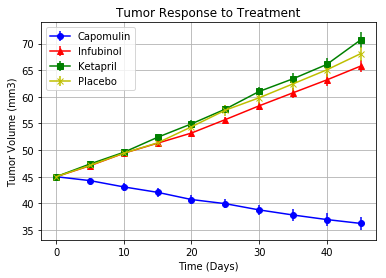

In [71]:
plt.errorbar(tumor_vols_pivot_mean.index,tumor_vols_pivot_mean["Capomulin"],yerr=tumor_vols_pivot_sem["Capomulin"],
             color='b',marker='o')
plt.errorbar(tumor_vols_pivot_mean.index,tumor_vols_pivot_mean["Infubinol"],yerr=tumor_vols_pivot_sem["Infubinol"],
             color='r',marker='^')
plt.errorbar(tumor_vols_pivot_mean.index,tumor_vols_pivot_mean["Ketapril"],yerr=tumor_vols_pivot_sem["Ketapril"],
             color='g',marker='s')
plt.errorbar(tumor_vols_pivot_mean.index,tumor_vols_pivot_mean["Placebo"],yerr=tumor_vols_pivot_sem["Placebo"],
             color='y',marker='x')
plt.grid(True)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

In [72]:
metastatic_avg = merged_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
metastatic_avg_df = pd.DataFrame(metastatic_avg)
metastatic_avg_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [73]:
metastatic_sem = merged_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
metastatic_sem_df = pd.DataFrame(metastatic_sem)
metastatic_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [74]:
metastatic_avg = metastatic_avg.reset_index()
metastatic_avg_pivot = metastatic_avg.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

metastatic_sem = metastatic_sem.reset_index()
metastatic_sem_pivot = metastatic_sem.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

metastatic_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


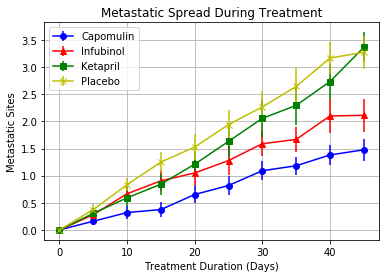

In [75]:
plt.errorbar(metastatic_avg_pivot.index,metastatic_avg_pivot["Capomulin"],yerr=metastatic_sem_pivot["Capomulin"],
             color='b',marker='o')
plt.errorbar(metastatic_avg_pivot.index,metastatic_avg_pivot["Infubinol"],yerr=metastatic_sem_pivot["Infubinol"],
             color='r',marker='^')
plt.errorbar(metastatic_avg_pivot.index,metastatic_avg_pivot["Ketapril"],yerr=metastatic_sem_pivot["Ketapril"],
             color='g',marker='s')
plt.errorbar(metastatic_avg_pivot.index,metastatic_avg_pivot["Placebo"],yerr=metastatic_sem_pivot["Placebo"],
             color='y',marker='x')
plt.grid(True)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")

In [76]:
survival_rates_mean = merged_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
survival_rates_mean_df = pd.DataFrame(survival_rates_mean)
survival_rates_mean_df = survival_rates_mean_df.rename(columns={"Mouse ID":"Mouse Count"})
# survival_rates_mean = survival_rates_mean.groupby(["Drug", "Timepoint"]).sem()["Mouse ID"]
# survival_rates_mean_df = pd.DataFrame(survival_rates_mean)

survival_rates_mean_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [77]:
survival_rates_mean_df = survival_rates_mean_df.reset_index()
survival_rates_mean_pivot = survival_rates_mean_df.pivot(index="Timepoint",columns="Drug")["Mouse Count"]



survival_rates_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


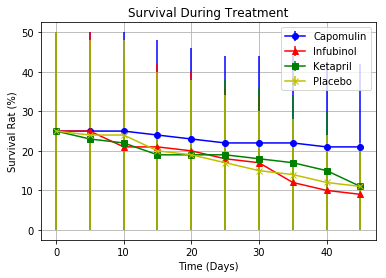

In [78]:
plt.errorbar(survival_rates_mean_pivot.index,survival_rates_mean_pivot["Capomulin"],yerr=survival_rates_mean_pivot["Capomulin"],
             color='b',marker='o')
plt.errorbar(survival_rates_mean_pivot.index,survival_rates_mean_pivot["Infubinol"],yerr=survival_rates_mean_pivot["Infubinol"],
             color='r',marker='^')
plt.errorbar(survival_rates_mean_pivot.index,survival_rates_mean_pivot["Ketapril"],yerr=survival_rates_mean_pivot["Ketapril"],
             color='g',marker='s')
plt.errorbar(survival_rates_mean_pivot.index,survival_rates_mean_pivot["Placebo"],yerr=survival_rates_mean_pivot["Placebo"],
             color='y',marker='x')
plt.grid(True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rat (%)")
plt.legend(loc="best")

plt.show()